<!--# <font color=darkblue>CE 5364 Groundwater Transport Phenemona <br> Fall 2023 Exercise Set 3</font>-->

# F23 ES3 Solution Sketch

**LAST NAME, FIRST NAME**

**R00000000**

<hr>

## Purpose : 
Apply selected analytical models for reactive transport
 
## Assessment Criteria : 
Completion, results plausible, format correct, example calculations shown.  


<hr>

## Problem 1 (Problem 6-7, pg. 588)

An instantaneous release of biodegradable constituients occurs in a 1-D aquifer. Assume the mass released is $1.0 ~kg$ over a $10~m^2$ area normal to the flow direction, $\alpha_l = 1.0~m$, the seepage velocity is 1.0 $\frac{m}{day}$, and the half-life of the decaying constituient is 33 years.

Determine:

1. The maximum concentration at 100 meters from the source.
2. Plot a concentration history (annual intervals) for a 40 year period from release date for a location 100 meters from the source.


In [31]:
# sketch(s) 
# list known quantities
# list unknown quantities
# governing principles
# solution details (e.g. step-by-step computations)
# discussion

## Known quantities

initial mass = 1 kg. <br>
cross section area = 10 $m^2$<br>
$\alpha_L = 1.0~m$ <br>
$v_x = 1~\frac{m}{d}$<br>
$\lambda = \frac{t_{1/2}}{0.693}$



## list unknown quantities

$C(100,t)_{max}$<br>
Plot $C(100,t)~\text{for}~t=1,2,...,40~yr$<br>

## governing principles

- Finite mass implies instant release. Use equation 6.18 as modified on g. 175 in book<br>

![](pr1.png)

## solution details (e.g. step-by-step computations)

Build a prototype function

In [32]:
def c1addinst(distance,time,mass,dispersion,velocity,decay):
    import math
    term0 = math.exp(-1.0*decay*time)
    term1 = math.sqrt(4.0*math.pi*dispersion*time)
    term2 = math.exp(-((distance-velocity*time)**2)/(4.0*dispersion*time))
    c1addinst = term0*(mass/term1)*term2
    return(c1addinst)

Build input data manager, report intermediate computations

In [33]:
import math
total_mass  = 1.0
area        = 10 
mass        = total_mass/area
velocity    = 1.0 #m/day
dispersivity = 1.0 #m
dispersion  = velocity*dispersivity #m^2/day
half_life  = 33 #years
decay = math.log(2)/(half_life)/365 #1/days
print("Mass : ",round(mass,3)," kg/m^3")
print("Decay constant : ",round(decay,6)," day^-1 ")
print("Dispersion : ",round(dispersion,3)," m^2/day")
#print(math.log(2))

Mass :  0.1  kg/m^3
Decay constant :  5.8e-05  day^-1 
Dispersion :  1.0  m^2/day


Plot a concentration history over 40 years

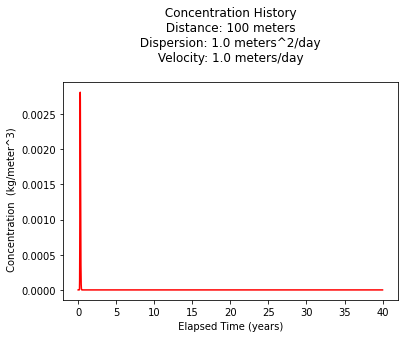

In [34]:
deltat      = (1.0) #days
howmany =     365*40/deltat 
howmany = int(howmany)

t = [] #days
for i in range(howmany):
    t.append(float(i)*deltat)
    if t[i] == 0: # trap zero time to prevent divide by zero
        t[i]= 0.00000001
    
distance        = 100  #years as days

c = [0 for i in range(howmany)] #concentration 

for i in range(howmany):
    c[i]=c1addinst(distance,t[i],mass,dispersion,velocity,decay)

# rescale time into years
for i in range(howmany):
    t[i]=t[i]/365.
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration History \n Distance: " + repr(distance) + " meters \n" + " Dispersion: " + repr(dispersion) + " meters^2/day \n" + " Velocity: " + repr(velocity) + " meters/day \n") # caption the plot object
plt.xlabel(" Elapsed Time (years) ") # label x-axis
plt.ylabel(" Concentration  (kg/meter^3)      ") # label y-axis
#plt.plot([365,365],[0,c0])
#plt.plot([365*2,365*2],[0,c0])
#plt.text(365,100,"  year 1")
#plt.text(365*2,100,"  year 2")
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use
#print("Center of Distribution Position : ",round(time*velocity,2)," length units")

Plot a concentration history over one year (easier to see)

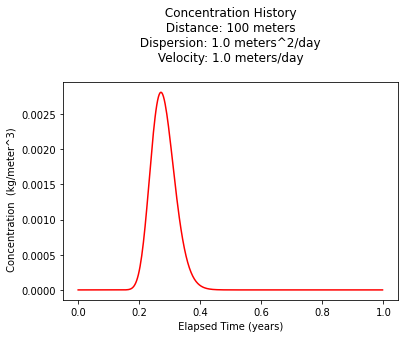

In [35]:
deltat      = (1.0) #days
howmany =     365*1/deltat 
howmany = int(howmany)

t = [] #days
for i in range(howmany):
    t.append(float(i)*deltat)
    if t[i] == 0: # trap zero time to prevent divide by zero
        t[i]= 0.00000001
    
distance        = 100  #years as days

c = [0 for i in range(howmany)] #concentration 

for i in range(howmany):
    c[i]=c1addinst(distance,t[i],mass,dispersion,velocity,decay)

# rescale time into years
for i in range(howmany):
    t[i]=t[i]/365.
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration History \n Distance: " + repr(distance) + " meters \n" + " Dispersion: " + repr(dispersion) + " meters^2/day \n" + " Velocity: " + repr(velocity) + " meters/day \n") # caption the plot object
plt.xlabel(" Elapsed Time (years) ") # label x-axis
plt.ylabel(" Concentration  (kg/meter^3)      ") # label y-axis
#plt.plot([365,365],[0,c0])
#plt.plot([365*2,365*2],[0,c0])
#plt.text(365,100,"  year 1")
#plt.text(365*2,100,"  year 2")
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use
#print("Center of Distribution Position : ",round(time*velocity,2)," length units")

Looks like maximum occurs at about 100 days, but lets just be stupid about it and find the value from the plot, and report the time of occurance (in days)

In [36]:
print("Maximum concentration : ",max(c)," kg/m^3")
print("          Observed at : ",t[c.index(max(c))]*365," days")
print(c1addinst(distance,100,mass,dispersion,velocity,decay))


Maximum concentration :  0.0028119432286784715  kg/m^3
          Observed at :  99.0  days
0.0028047609791774213


<hr>

## Problem 2 (Problem 6-9, pg. 589)

An unintentional discharge from a point source introduced $10~kg$ of contaminant mass to an aquifer. The seepage velocity is $0.1~\frac{ft}{day}$ in the $+x$ direction.  The longitudinal dispersion coefficient is $D_x = 0.01 \frac{ft^2}{day}$ the transverse dispersion coefficients are $D_y = D_z = 0.001 \frac{ft^2}{day}$.

Determine:

1. Calculate the maximum concentration at $x=100~ft$ and $t=5~years$.
2. Calculate the concentration at $(x,y,z,t) = (200~ft,5~ft,2~ft,5~years)$



In [37]:
# sketch(s) 
# list known quantities
# list unknown quantities
# governing principles
# solution details (e.g. step-by-step computations)
# discussion

### governing principles

**point** source spill; use Equation 6.28 in book <br>

![](beasties.png)

### solution details (e.g. step-by-step computations)

Create a prototype function

In [38]:
def c3addinst(x,y,z,t,m,dx,dy,dz,v,lm):
# Baetsle 1969 model
    import math
    term0 = math.exp(-1.0*lm*t)
    term1 = 8.0*math.sqrt(math.pi*dx*t*math.pi*dy*t*math.pi*dz*t)
    term2 = math.exp(-((x-v*t)**2)/(4.0*dx*t) -((y)**2)/(4.0*dy*t) -((z)**2)/(4.0*dz*t))
    c3addinst = term0*(mass/term1)*term2
    return(c3addinst)

Build input data manager, report intermediate computations

In [39]:
mass        = 10.0 #kg
velocity    = 0.1 #ft/day
disp_x = 0.01  #ft^2/day
disp_y = 0.001 #ft^2/day
disp_z = 0.001 #ft^2/day

print("         Mass : ",round(mass,3)," kg/m^3")
print("Pore velocity : ",round(velocity,3)," ft/day")
print(" Dispersion x : ",round(disp_x,3)," ft^2/day")
print(" Dispersion y : ",round(disp_y,3)," ft^2/day")
print(" Dispersion z : ",round(disp_z,3)," ft^2/day")

         Mass :  10.0  kg/m^3
Pore velocity :  0.1  ft/day
 Dispersion x :  0.01  ft^2/day
 Dispersion y :  0.001  ft^2/day
 Dispersion z :  0.001  ft^2/day


Calculate the maximum concentration at $x=100~ft$ 
- use a history plot

Calculate the maximum concentration at $t=5~years$
- use a profile plot

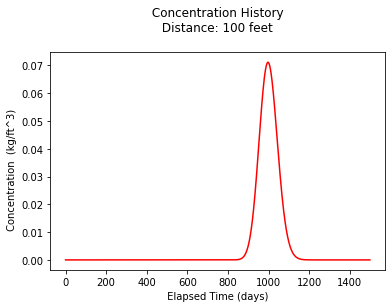

In [40]:
deltat      = (1.0) #days
howmany =     1500/deltat 
howmany = int(howmany)

t = [] #days
for i in range(howmany):
    t.append(float(i)*deltat)
    if t[i] == 0: # trap zero time to prevent divide by zero
        t[i]= 0.00000001
    
x        = 100  #ft
y        = 0
z        = 0

c = [0 for i in range(howmany)] #concentration 

for i in range(howmany):
    c[i]=c3addinst(x,y,z,t[i],mass,disp_x,disp_y,disp_z,velocity,0)


#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration History \n Distance: " + repr(x) + " feet \n" ) # caption the plot object
plt.xlabel(" Elapsed Time (days) ") # label x-axis
plt.ylabel(" Concentration  (kg/ft^3)      ") # label y-axis
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here

In [41]:
print("Maximum concentration : ",max(c)," kg/ft^3")
print("          Observed at : ",t[c.index(max(c))]," days")

Maximum concentration :  0.07114794548155023  kg/ft^3
          Observed at :  997.0  days


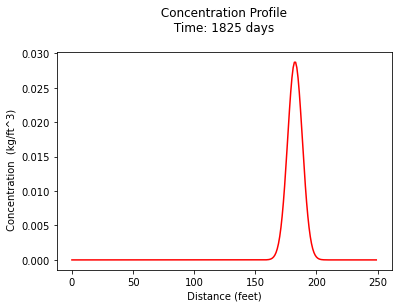

In [42]:
deltax      = (1.0) #days
howmany =     250/deltax
howmany = int(howmany)

x = [] #feet
for i in range(howmany):
    x.append(float(i)*deltax)

    
t        = 5*365  #days
y        = 0
z        = 0

c = [0 for i in range(howmany)] #concentration 

for i in range(howmany):
    c[i]=c3addinst(x[i],y,z,t,mass,disp_x,disp_y,disp_z,velocity,0)


#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Time: " + repr(t) + " days \n" ) # caption the plot object
plt.xlabel(" Distance (feet) ") # label x-axis
plt.ylabel(" Concentration  (kg/ft^3)      ") # label y-axis
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here

In [16]:
print("Maximum concentration : ",max(c)," kg/ft^3")
print("          Observed at : ",x[c.index(max(c))]," feet")

Maximum concentration :  0.02869482568927895  kg/ft^3
          Observed at :  182.0  feet


Calculate the concentration at $(x,y,z,t) = (200~ft,5~ft,2~ft,5~years)$

In [17]:
conc = c3addinst(200,5,2,5*365,mass,disp_x,disp_y,disp_z,velocity,0)
print("C(200,5,2,5) : ",round(conc,7)," kg/ft^3")

C(200,5,2,5) :  8.2e-06  kg/ft^3


<hr>

## Problem 3 (Problem 6-10, pg. 589)

Apply the Domenico and Schwartz (1998) planar source model (pg. XXX) to a case of a continuous source that has been leaking contaminant into an aquifer for 15 years.  The source had a width $Y=6~m$ and depth $Z=6~m$. The source concentration is $10~\frac{mg}{l}$. The seepage velocity is $0.057~\frac{m}{day}$. The longitudinal, transverse, and vertical dispervities are $1~m$,$0.1~m$, and $0.01~m$ respectively.

Determine:

1. The contaminant concentration history at a location $x=200~m$ from the source using 1-year increments for 30 years.

In [43]:
# sketch(s) 
# list known quantities
# list unknown quantities
# governing principles
# solution details (e.g. step-by-step computations)
# discussion

### sketch(s) 
### list known quantities
### list unknown quantities
### governing principles

Using the planar source model (Eqn 6.31)

![](planarsource.png)

### solution details (e.g. step-by-step computations)

Usual procedure, first a prototype function - unlike prior cases will use dispersivities rather than dispersion coefficients:

In [44]:
def c3dad(conc0, distx, disty, distz, lenX, lenY, lenZ, dispx, dispy, dispz, velocity, etime):
    import math
    from scipy.special import erf, erfc # scipy needs to already be loaded into the kernel
    # Constant of integration
    term1 = conc0 / 8.0

    # Centerline axis solution
    arg1 = (distx - velocity*etime) / (2*math.sqrt(dispx*velocity*etime)) #dispx is dispersivity
    term2 = erfc(arg1)

    # Off-axis solution, Y direction
#    arg2 = 2.0 * math.sqrt(dispy*distx / velocity)
    arg2 = 2.0 * math.sqrt(dispy*distx) #dispy is dispersivity
    arg3 = disty + 0.5*lenY
    arg4 = disty - 0.5*lenY
    term3 = erf(arg3 / arg2) - erf(arg4 / arg2)

    # Off-axis solution, Z direction
#    arg5 = 2.0 * math.sqrt(dispz*distx / velocity)
    arg5 = 2.0 * math.sqrt(dispz*distx) #dispz is dispersivity
    arg6 = distz + 0.5*lenZ
    arg7 = distz - 0.5*lenZ
    term4 = erf(arg6 / arg5) - erf(arg7 / arg5)

    # Convolve the solutions
    c3dad = term1 * term2 * term3 * term4
    return c3dad

Now an input manager section

In [45]:
# inputs
conco = 10.0
velocity = 0.057
dispersivity_x = 1.0
dispersivity_y = 0.1
dispersivity_z = 0.01
width_y = 6.0
width_z = 6.0
xloc = 200.0
yloc = 0.0 # not explicit in problem statement
zloc = 0.0
time = 30*365 #years as days
# echo inputs
print("Source Concentration : ",round(conco,3)," ppm ")
print("            Velocity : ",round(velocity,3)," m/sec ")
print("     Dispersivity_x  : ",round(dispersivity_x,3)," m ")
print("     Dispersivity_y  : ",round(dispersivity_x,3)," m ")
print("     Dispersivity_z  : ",round(dispersivity_x,3)," m ")
print("             Width Y : ",round(width_y,3)," m ")
print("             Width Z : ",round(width_z,3)," m ")

Source Concentration :  10.0  ppm 
            Velocity :  0.057  m/sec 
     Dispersivity_x  :  1.0  m 
     Dispersivity_y  :  1.0  m 
     Dispersivity_z  :  1.0  m 
             Width Y :  6.0  m 
             Width Z :  6.0  m 


Now build script for concentration history (time is the variable)

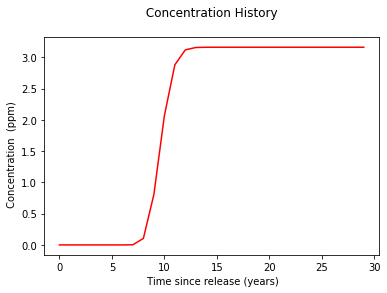

In [46]:
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 30   
deltat = time/how_many_points
t = [i*deltat for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation

t[0]=1e-5 #cannot have zero time, so use really small value first position in list
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = c3dad(conco, xloc, yloc, zloc, 0, width_y, width_z, dispersivity_x, dispersivity_y, dispersivity_z, velocity, t[i])
for i in range(0,how_many_points,1):
    t[i]=t[i]/365 # days as years
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration History \n  ") # caption the plot object
plt.xlabel(" Time since release (years)") # label x-axis
plt.ylabel(" Concentration  (ppm)      ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

### discussion

The equilibrium concentration can be found from the plot either by finding the maximum in the list or just taking the last element in the list.

In [22]:
print("Equilibrium concentration @ x=200,y=0,z=0,t->big : ",round(max(c),3)," ppm ")

Equilibrium concentration @ x=200,y=0,z=0,t->big :  3.16  ppm 


<hr>

## Problem 4 

The following table has data from a column test with bromide (conservative) and chromium (sorbed).  The porosity of the soil was 0.485, the bulk density was 1.85 g/cc, velocity was 0.244 cm/min, and the column was 25.4 cm long with a diameter of 2.54 cm.  


|Time (min)|Bromide $\frac{C}{Co}$|Chromium $\frac{C}{Co}$|
|:---|:---|:---|
|0|0.000|0.000|
|15|0.000|0.000|
|30|0.005|0.000|
|45|0.003|0.000|
|60|0.013|0.000|
|75|0.075|0.000|
|90|0.137|0.000|
|105|0.530|0.000|
|120|0.841|0.000|
|135|1.000|0.000|
|150|1.000|0.000|
|165|1.000|0.009|
|180|1.000|0.186|
|195|1.000|0.595|
|210|1.000|0.791|
|225|1.000|0.875|
|240|1.000|0.913|
|255|1.000|0.946|
|270|1.000|0.946|
|285|1.000|1.000|
|300|1.000|1.000|
|315|1.000|1.000|
|330|1.000|1.000|
|345|1.000|1.000|
|360|1.000|1.000|

Determine:

1. The dispersivity in cm 
2. The retardation coefficient for $Cr$.


In [47]:
# sketch(s) 
# list known quantities
# list unknown quantities
# governing principles
# solution details (e.g. step-by-step computations)
# discussion

In [48]:
# sketch(s) 
# list known quantities
# list unknown quantities
# governing principles

### solution details (e.g. step-by-step computations)

Prototype function from class notes

In [49]:
#
# prototype decaying species function
#
def c1dadrd(c_source,space,time,dispersion,velocity,retardation,decay):
    from math import sqrt,erf,erfc,exp  # get special math functions
    dee = dispersion/retardation
    vee = velocity/retardation
    uuu = (vee**2 + 4.0*decay*dee)
    uuu = sqrt(uuu)
    arg1 = (space*(vee-uuu))/(2.0*dee)
    arg2 = (space - uuu*time)/(2.0*sqrt(dee*time))
    arg3 = (space*(vee+uuu))/(2.0*dee)
    arg4 = (space + uuu*time)/(2.0*sqrt(dee*time))
    temp1 = c_source/2.0
    temp2 = exp(arg1)
    temp3 = erfc(arg2)
    temp4 = exp(arg3)
    temp5 = erfc(arg4)
    
    c1dadrd = temp1*(temp2*temp3+temp4*temp5)
    
    return c1dadrd

### copy the data from the table above 
1. cut-n-paste, then 
2. insert delimiters
3. Parse into useable lists

In [50]:
# copy the data from the table above (cut-n-paste, then insert delimiters)
p4df = [[0 ,0.000 ,0.000],
[15 ,0.000 ,0.000],
[30 ,0.005 ,0.000],
[45 ,0.003 ,0.000],
[60 ,0.013 ,0.000],
[75 ,0.075 ,0.000],
[90 ,0.137 ,0.000],
[105 ,0.530 ,0.000],
[120 ,0.841 ,0.000],
[135 ,1.000 ,0.000],
[150 ,1.000 ,0.000],
[165 ,1.000 ,0.009],
[180 ,1.000 ,0.186],
[195 ,1.000 ,0.595],
[210 ,1.000 ,0.791],
[225 ,1.000 ,0.875],
[240 ,1.000 ,0.913],
[255 ,1.000 ,0.946],
[270 ,1.000 ,0.946],
[285 ,1.000 ,1.000],
[300 ,1.000 ,1.000],
[315 ,1.000 ,1.000],
[330 ,1.000 ,1.000],
[345 ,1.000 ,1.000],
[360 ,1.000 ,1.000]]
# count rows
howmanyrows = len(p4df)
# allocate lists
t=[0 for i in range(howmanyrows)]
bromide=[0 for i in range(howmanyrows)]
chromium=[0 for i in range(howmanyrows)]
# parse into useful lists
for irow in range(howmanyrows):
    t[irow]=p4df[irow][0]
    bromide[irow]=p4df[irow][1]
    chromium[irow]=p4df[irow][2]

if t[0]==0:t[0]=0.00001

build an input data manager
- echo inputs
- plot observations and model results
- trial-and-error (or some optimization) to minimize prediction error by changing dispersivity and retardation to recover values
- report results

        ---- Supplied Values ----  
                 Porosity :  0.485
            Pore Velocity :  0.244  cm/min
             Dispersivity :  0.232  cm 
 Molecular Diffusivity Br :  0.001111  cm^2/min 
 Molecular Diffusivity Cr :  0.00072  cm^2/min 
    Retardation Factor Br :  1.0
    Retardation Factor Cr :  1.9
        ---- Computed Values ----  
       Specific Discharge :  0.11834  cm/min 
               Dispersion :  0.057  cm^2/min 
               Kd-bromide :  0.0
              Kd-chromium :  0.236


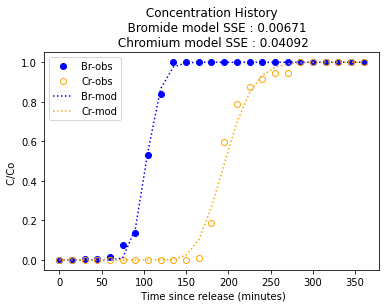

In [51]:
# input data manager
porosity = 0.485
velocity = 0.244 #cm/min
dispersivity = 0.232 #initial guess - change to fit bromide curve
retardationBr = 1.0
retardationCr = 1.9
dCr = (1.2e-09)*60*100*100 #molecular diffusivity - in cm^2/min
dBr = (1.6e-04)*100*100/1440 #molecular diffusivity in cm^2/min
spdischarge = velocity*porosity
dispersion = dispersivity*velocity
length = 25.4 #cm
diameter = 2.54 #cm
rhob = 1.85 #g/ml
#echo inputs
print("        ---- Supplied Values ----  ")
print("                 Porosity : ",porosity)
print("            Pore Velocity : ",round(velocity,3)," cm/min" )
print("             Dispersivity : ",dispersivity," cm ")
print(" Molecular Diffusivity Br : ",round(dBr,6)," cm^2/min ")
print(" Molecular Diffusivity Cr : ",round(dCr,6)," cm^2/min ")
print("    Retardation Factor Br : ",retardationBr)
print("    Retardation Factor Cr : ",retardationCr)
print("        ---- Computed Values ----  ")
print("       Specific Discharge : ",spdischarge," cm/min ")
print("               Dispersion : ",round(dispersion,3)," cm^2/min ")
print("               Kd-bromide : ",round((retardationBr-1)*(porosity/rhob),3))
print("              Kd-chromium : ",round((retardationCr-1)*(porosity/rhob),3))

# build simulation results
brmodel = [0 for i in range(howmanyrows)]
crmodel = [0 for i in range(howmanyrows)]
for irow in range(howmanyrows):
    brmodel[irow]= c1dadrd(1.0,length,t[irow],dispersion+dBr,velocity,retardationBr,0)
    crmodel[irow]= c1dadrd(1.0,length,t[irow],dispersion+dCr,velocity,retardationCr,0)
# compute some error measure
sseBr = 0.0
sseCr = 0.0
for irow in range(howmanyrows):
    sseBr = sseBr + ((bromide[irow]-brmodel[irow])**2)
    sseCr = sseCr + ((chromium[irow]-crmodel[irow])**2)
#plot simulation and observation results
from matplotlib import pyplot as plt
plt.plot(t,bromide, color='blue', linestyle = "none", marker = 'o')  # make the plot object
plt.plot(t,chromium, color='orange', linestyle = "none", marker = 'o', fillstyle = 'none')  # make the plot object
plt.plot(t,brmodel, color='blue', linestyle = "dotted" )  # make the plot object
plt.plot(t,crmodel, color='orange', linestyle = "dotted")  # make the plot object
plt.title(" Concentration History \n  " + " Bromide model SSE : " + repr(round(sseBr,5)) + "\n Chromium model SSE : " + repr(round(sseCr,5))) # caption the plot object
plt.xlabel(" Time since release (minutes)") # label x-axis
plt.ylabel(" C/Co        ") # label y-axis
#plt.xscale('log')
#plt.yscale('log')
plt.legend(["Br-obs","Cr-obs","Br-mod","Cr-mod"])
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

### discussion

Trial-and-error fit could be replaced by an optimizer (Solver in excel, or some python equilivant), but hardly worth the effort - once you have the advection part (C/Co = 0.5) located, then dispersivity controls curvature.  If one could argue for different dispersivities for each species could get a better fit, but dispersivtiy is considered a material property of the porous media.  The solution above uses literature supplied diffusivities from:

![](diffusivityBr.png)

and

![](diffusivityCr.png)

<hr>

## Problem 5 

A batch isotherm test was performed with several 1-L solutions of the chemical of interest and one soil type, 20 g in each solution container.  The initial and final solution concentrations are shown in the table.  Fit the linear, Freundlich, and Langmuir isotherm equations to this data.  

|Initial Concentration (mg/L)|Equilibrium Concentration (mg/L)|
|:---|:---|
|7.10|6.71|
|4.53|4.18|
|1.89|1.63|
|1.31|1.10|
|1.03|0.85|

Determine:

1. The Linear isotherm equation for these data (i.e. fit the isotherm model to the data), plot the isotherm and data
2. The Freundlich isotherm equation for these data, plot the isotherm and data
3. The Langmuir isotherm equation for these data, plot the isotherm and data
4. Which isotherm model produces the best fit for these data?

Show calculations and identify all fitted parameter values.


Using curve fitting methods from [Theodore G. Cleveland, Farhang Forghanparast (2021), Computational Thinking and Data Science: Instructor’s Notes for ENGR 1330 at TTU, with contributions by: Dinesh Sundaravadivelu Devarajan, Turgut Batuhan Baturalp (Batu), Tanja Karp, Long Nguyen, and Mona Rizvi. Whitacre College of Engineering, DOI (pending) ](http://54.243.252.9/engr-1330-webroot/engr1330jb/_build/html/lessons/lesson30/lesson30.html?highlight=fitting)


## Linear isotherm 

Linear isotherm equation for these data (i.e. fit the isotherm model to the data), plot the isotherm and data

In [52]:
p5df = [[7.10 ,6.71],
[4.53 ,4.18],
[1.89 ,1.63],
[1.31 ,1.10],
[1.03 ,0.85]]
howmanyrows = len(p5df)# allocate lists
c0=[0 for i in range(howmanyrows)]
cEq=[0 for i in range(howmanyrows)]
cS=[0 for i in range(howmanyrows)]
cSoS=[0 for i in range(howmanyrows)]
#input values
massS = 0.020 #kg
volL = 1 #L
# build lists
for i in range(howmanyrows):
    c0[i]=p5df[i][0]
    cEq[i]=p5df[i][1]
    cS[i]=(c0[i]-cEq[i])*volL/massS
    cSoS[i]=cEq[i]/cS[i]

In [55]:
# Now we need to do some analysis to earn our keep
# heres how to do the fits using python
#Load the necessary packages
import numpy as np
import pandas as pd
import statistics 
import statsmodels.formula.api as smf # here is the regression package to fit lines
data = pd.DataFrame({'X':cEq, 'Y':cS}) # we use X,Y as column names for simplicity
#data.head()

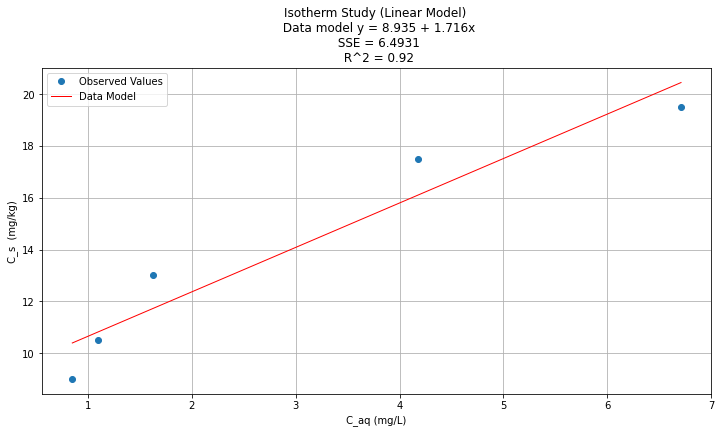

In [57]:

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Y ~ X', data=data) # model object constructor syntax
model = model.fit()

# Predict values
y_pred = model.predict()

beta0 = model.params[0] # the fitted intercept
beta1 = model.params[1]
sse = model.ssr
rsq = model.rsquared

titleline = "Isotherm Study (Linear Model) \n Data model y = " + str(round(beta0,3)) + " + " + str(round(beta1,3)) + "x" # put the model into the title
titleline = titleline + '\n SSE = ' + str(round(sse,4)) + '\n R^2 = ' + str(round(rsq,3)) 

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Y'], 'o')           # scatter plot showing actual data
plt.plot(data['X'], y_pred, 'r', linewidth=1)   # regression line
plt.xlabel(" C_aq (mg/L) ") # label x-axis
plt.ylabel(" C_s  (mg/kg) ") # label y-axis
plt.legend(['Observed Values','Data Model'])
plt.title(titleline)
plt.grid(which="both")
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

## The Freundlich isotherm 
Apply Freundlich isotherm equation for these data, plot the isotherm and data

In [ ]:
data = pd.DataFrame({'X':cEq, 'Y':cS}) # we use X,Y as column names for simplicity
import math
data['lnX']=data['X'].apply(math.log)
data['lnY']=data['Y'].apply(math.log)
#data.head()

In [ ]:
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('lnY ~ lnX', data=data) # model object constructor syntax
model = model.fit()

# Predict values
y_pred = model.predict()

beta0 = model.params[0] # the fitted intercept
beta1 = model.params[1]
sse = model.ssr
rsq = model.rsquared

data['Ymod']=math.exp(beta0)*(data['X']**beta1)
print(data.head())

titleline = "Isotherm Study (Freundlich Model) \n Data model y = " + str(round(beta0,3)) + " + " + str(round(beta1,3)) + "x" # put the model into the title
titleline = titleline + '\n SSE = ' + str(round(sse,4)) + '\n R^2 = ' + str(round(rsq,3)) 

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Y'], 'o')           # scatter plot showing actual data
plt.plot(data['X'],data['Ymod'], 'r', linewidth=1)   # regression line
plt.xlabel("C_aq (mg/L) ") # label x-axis
plt.ylabel("C_s  (mg/kg) ") # label y-axis
plt.yscale('log') # set y-axis to display a logarithmic scale #################
plt.xscale('log') # set x-axis to display a logarithmic scale #################
plt.legend(['Observed Values','Data Model'])
plt.title(titleline)
plt.grid(which="both")
plt.show() # plot to stdio -- has to be last call as it kills prior objects

## The Langmuir isotherm 
Apply Langmuir isotherm equation for these data, plot the isotherm and data

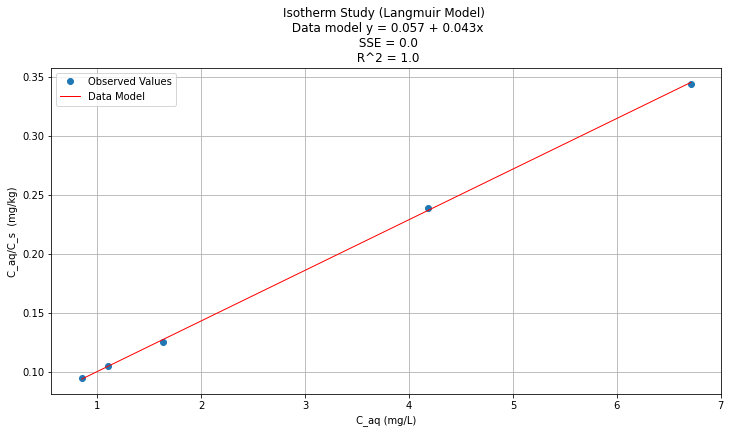

In [58]:
data = pd.DataFrame({'X':cEq, 'Y':cSoS}) # we use X,Y as column names for simplicity
#data.head()

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Y ~ X', data=data) # model object constructor syntax
model = model.fit()

# Predict values
y_pred = model.predict()

beta0 = model.params[0] # the fitted intercept
beta1 = model.params[1]
sse = model.ssr
rsq = model.rsquared

titleline = "Isotherm Study (Langmuir Model) \n Data model y = " + str(round(beta0,3)) + " + " + str(round(beta1,3)) + "x" # put the model into the title
titleline = titleline + '\n SSE = ' + str(round(sse,4)) + '\n R^2 = ' + str(round(rsq,3)) 

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Y'], 'o')           # scatter plot showing actual data
plt.plot(data['X'], y_pred, 'r', linewidth=1)   # regression line
plt.xlabel(" C_aq (mg/L) ") # label x-axis
plt.ylabel(" C_aq/C_s  (mg/kg) ") # label y-axis
plt.legend(['Observed Values','Data Model'])
plt.title(titleline)
plt.grid(which="both")
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

## Which isotherm model produces the best fit for these data?

Using R^2 as criterion,Langmuir is bestest